# Data visualisation

In the Notebook we are looking to explore the HANNA data base.

In [11]:
# importations
import csv
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pingouin as pg 
from scipy.special import binom
import scipy.stats as st
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
from sklearn.metrics import f1_score
from utils import *

## Loading the data

In [14]:
data_annotations = pd.read_csv("hanna_stories_annotations.csv")

There are 96 different prompts and thus for each model there are 96 stories.

In [75]:
data_annotations.tail()

,Story ID,Prompt,Human,Story,Model,Relevance,Coherence,Empathy,Surprise,Engagement,Complexity,Worker ID,Assignment ID,Work time in seconds,Name
3163,1054,"When a new president is elected, they are give...",“Mr President I want you to know I am telling ...,'said a puppet'President Bush stopped the old ...,TD-VAE,2,1,1,3,2,2,A2WNW8A4MOR7T7,3QHK8ZVMIXPJUK85ND02LXTCPDOBLG,140.0,Bush
3164,1054,"When a new president is elected, they are give...",“Mr President I want you to know I am telling ...,'said a puppet'President Bush stopped the old ...,TD-VAE,3,2,3,2,2,3,A264NN7JBX4UDQ,3RANCT1ZVQOMDAVZWRS3CKPV2N6BU1,467.0,none
3165,1055,You discover a grand hall filled with legendar...,"Waking with a start, my blankets strewn wildly...",It is YOU. Your mother's greatest love.”...'Oh...,TD-VAE,3,4,2,2,3,3,A1IZ4NX41GKU4X,3ATTHHXXWLVOHM3076V7IESCSB5IX4,65.0,mother
3166,1055,You discover a grand hall filled with legendar...,"Waking with a start, my blankets strewn wildly...",It is YOU. Your mother's greatest love.”...'Oh...,TD-VAE,2,5,5,5,5,5,A264NN7JBX4UDQ,3F6KKYWMNM82XH9ADM7NTFL1XCJNDM,214.0,none
3167,1055,You discover a grand hall filled with legendar...,"Waking with a start, my blankets strewn wildly...",It is YOU. Your mother's greatest love.”...'Oh...,TD-VAE,2,1,1,1,1,1,A2VE5IV9OD2SK1,3LUY3GC63A7MJTKD2OHTXCG0BTT7PB,306.0,None


The different model used are as follow:

In [17]:
data_annotations['Model'].unique()

array(['Human', 'BertGeneration', 'CTRL', 'GPT', 'GPT-2 (tag)', 'GPT-2',
       'RoBERTa', 'XLNet', 'Fusion', 'HINT', 'TD-VAE'], dtype=object)

In [18]:
data_scores = pd.read_csv("hanna_metric_scores.csv")

In [78]:
data_scores.tail()

,Model,Relevance,Coherence,Empathy,Surprise,Engagement,Complexity,BLEU Ξ§,ROUGE-1 Recall Ξ§,ROUGE-1 Precision Ξ§,...,Repetition-2 ¤§,Repetition-3 ¤§,SUPERT-PS ¤ε,SUPERT-SS ¤ε,BLANC-Tune-PS ¤Δ,BLANC-Help-PS ¤Δ,BLANC-Tune-SS ¤Δ,BLANC-Help-SS ¤Δ,BARTScore-PS ¤Δ,BARTScore-SP ¤Δ
6,RoBERTa,"[2.0, 2.3333333333333335, 2.0, 3.6666666666666...","[3.0, 2.6666666666666665, 3.6666666666666665, ...","[2.3333333333333335, 2.0, 2.6666666666666665, ...","[1.6666666666666667, 1.3333333333333333, 3.666...","[2.0, 2.0, 3.0, 4.333333333333333, 2.0, 1.6666...","[2.0, 2.3333333333333335, 3.0, 3.6666666666666...","[1.1807274169, 1.9723572012, 0.14924418, 0.218...","[0.3318, 0.31111, 0.16285, 0.15347, 0.30968, 0...","[0.32432, 0.4058, 0.57399, 0.61165, 0.2212, 0....",...,"[0.06147540983606557, 0.0825242718446602, 0.07...","[0.01953125, 0.02666666666666667, 0.0161290322...","[0.3652871039595953, 0.2685756867276348, 0.362...","[0.3652871039595953, 0.2685756867276348, 0.362...","[0.027522935779816515, 0.00980392156862745, 0....","[0.009174311926605505, 0.0196078431372549, 0.0...","[-0.11764705882352941, -0.14285714285714285, 0...","[-0.11764705882352941, 0.0, 0.09375, 0.125, 0....","[-4.090158939361572, -4.411034107208252, -4.04...","[-4.437648773193359, -5.67439603805542, -4.802..."
7,XLNet,"[2.0, 3.0, 1.3333333333333333, 2.3333333333333...","[3.0, 2.6666666666666665, 2.0, 2.3333333333333...","[2.0, 1.6666666666666667, 1.6666666666666667, ...","[2.0, 1.3333333333333333, 1.6666666666666667, ...","[2.6666666666666665, 2.6666666666666665, 1.666...","[3.0, 2.3333333333333335, 1.3333333333333333, ...","[1.28633203, 1.7747416632, 0.2716583772, 0.436...","[0.3871, 0.22593, 0.20483, 0.18758, 0.43226, 0...","[0.22951, 0.25523, 0.41818, 0.49838, 0.18873, ...",...,"[0.13988095238095238, 0.09795918367346938, 0.1...","[0.03007518796992481, 0.029850746268656716, 0....","[0.318136842701576, 0.2224131163499796, 0.2902...","[0.30082513616594114, 0.21941221177209855, 0.3...","[0.005714285714285714, -0.00819672131147541, -...","[-0.005714285714285714, 0.01639344262295082, -...","[0.0, -0.14285714285714285, 0.03125, 0.0, -0.2...","[0.0, -0.2857142857142857, 0.03125, 0.0, -0.2,...","[-4.306793689727783, -5.588626384735107, -4.93...","[-4.770389080047607, -6.0159912109375, -4.7908..."
8,Fusion,"[2.0, 3.0, 1.3333333333333333, 2.3333333333333...","[3.6666666666666665, 2.6666666666666665, 3.0, ...","[1.6666666666666667, 2.3333333333333335, 1.666...","[2.3333333333333335, 1.3333333333333333, 2.333...","[2.6666666666666665, 1.6666666666666667, 2.333...","[2.6666666666666665, 1.6666666666666667, 2.666...","[0.9849444836, 1.2775331891, 0.02104559, 0.026...","[0.21198, 0.22963, 0.10051, 0.10962, 0.26452, ...","[0.34848, 0.47692, 0.6124, 0.69767, 0.29496, 0...",...,"[0.08396946564885496, 0.19327731092436976, 0.1...","[0.014184397163120567, 0.09923664122137404, 0....","[0.24084545342617641, 0.1717393621831428, 0.29...","[0.24084545342617641, 0.1717393621831428, 0.29...","[0.0, -0.018518518518518517, 0.018518518518518...","[0.03508771929824561, -0.018518518518518517, -...","[-0.11764705882352941, -0.14285714285714285, 0...","[-0.11764705882352941, -0.14285714285714285, 0...","[-4.327263832092285, -3.9988322257995605, -3.7...","[-5.250404357910156, -6.4783525466918945, -5.1..."
9,HINT,"[3.0, 3.0, 1.6666666666666667, 2.0, 2.33333333...","[2.6666666666666665, 3.3333333333333335, 1.333...","[2.3333333333333335, 2.6666666666666665, 2.0, ...","[2.0, 2.6666666666666665, 1.0, 1.3333333333333...","[2.6666666666666665, 3.0, 1.0, 2.0, 1.33333333...","[1.6666666666666667, 2.6666666666666665, 1.0, ...","[0.6685033818, 0.1211432139, 6.77581e-05, 0.00...","[0.21659, 0.11481, 0.0458, 0.07308, 0.2129, 0....","[0.35606, 0.32632, 0.72, 0.61856, 0.30556, 0.6...",...,"[0.3048780487804878, 0.5272727272727272, 0.35,...","[0.2808988764044944, 0.4057971014492754, 0.274...","[0.25919077170525007, 0.21959409934092944, 0.1...","[0.25919077170525007, 0.21959409934092944, 0.1...","[-0.07462686567164178, 0.0, 0.0833

In [77]:
relevance_data_human =data_scores[['Relevance']].values[:1]
relevance_data_bert = data_scores[['Relevance']].values[1:2]
data_scores['Relevance']

0     [3.6666666666666665, 5.0, 4.666666666666667, 3...
1     [1.6666666666666667, 3.0, 1.3333333333333333, ...
2     [2.3333333333333335, 3.6666666666666665, 2.666...
3     [3.6666666666666665, 3.0, 2.6666666666666665, ...
4     [3.0, 3.3333333333333335, 2.6666666666666665, ...
5     [2.6666666666666665, 3.0, 4.0, 4.3333333333333...
6     [2.0, 2.3333333333333335, 2.0, 3.6666666666666...
7     [2.0, 3.0, 1.3333333333333333, 2.3333333333333...
8     [2.0, 3.0, 1.3333333333333333, 2.3333333333333...
9     [3.0, 3.0, 1.6666666666666667, 2.0, 2.33333333...
10    [3.0, 3.3333333333333335, 2.3333333333333335, ...
Name: Relevance, dtype: object

We indeed have the relevance metric for 96 stories.

In [74]:
len(json.loads(relevance_data_human.tolist()[0][0]))

96

In order to benchmark the correlation of existing metrics with human scores we have the following steps: 

1.	Collect a dataset: You will need to collect a dataset of texts or documents that you will use for your NLP task. This dataset should be diverse enough to capture different variations of the language and the task at hand.

2.	Annotate the dataset: You will need to annotate the dataset with human scores. This involves having human annotators rate or evaluate the same task that your NLP model is performing. For example, if your NLP task is sentiment analysis, you can have human annotators rate the sentiment of each text or document on a scale of 1 to 5.

3.	Train your NLP model: You will need to train your NLP model on the annotated dataset using the existing metrics that you want to benchmark. For example, you can use accuracy, precision, recall, and F1 score as your evaluation metrics.

4.	Evaluate your NLP model: Once your model is trained, you can evaluate its performance on the same dataset using the existing metrics. This will give you an idea of how well your model is performing according to the current evaluation standards.

5.	Calculate the correlation: You can then calculate the correlation between the human scores and the existing metrics. You can use statistical methods such as Pearson correlation coefficient or Spearman's rank correlation coefficient to calculate the correlation.

6.	Analyze the results: Analyze the results to understand how well the existing metrics are correlated with human scores. If there is a high correlation, it indicates that the existing metrics are effective in evaluating the NLP model's performance. If there is a low correlation, it suggests that the existing metrics may not be sufficient and may need to be improved or replaced.





Here we are trying to evaluate the steps 5 and 6.

### Using the Pearson method

Calculate the covariance between the human scores and the existing metric. This can be done using the formula:

covariance = Σ[(human score - mean human score) * (metric - mean metric)] / (n - 1)

Where Σ represents the sum of the values for each story, n is the number of stories, and mean human score and mean metric are the means of the human scores and existing metric, respectively.

Calculate the Pearson correlation coefficient between the human scores and the existing metric. This can be done using the formula:

r = covariance / (standard deviation of human scores * standard deviation of existing metric)

In [66]:
# calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(json.loads(relevance_data_human.tolist()[0][0]), json.loads(relevance_data_bert.tolist()[0][0]))


In [68]:
# print the results
print("Pearson correlation coefficient for the BertGeneration model and the relevance metric:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient for the BertGeneration model and the relevance metric: -0.029086742829064545
p-value: 0.7784672746915751


## Story-level correlation

We want to average out on all of our stories the criterion beteween metric 1 and metric 2.  

## Trying to reproduce figure 1

In [97]:
#let's try first with the pearson criterion and between the relevance and the coherence factors 


#we want a coefficient with the scores of all systems for the the first prompt

c_relevance= np.array( [json.loads(l) for l in data_scores['Relevance'].tolist()]).T
c_coherence= np.array( [json.loads(l) for l in data_scores['Coherence'].tolist()]).T

k=np.zeros(len(c_relevance[0]))
for i in range(len(c_relevance[0])):
    k[i]=pearsonr(c_relevance[i],c_coherence[i] )[0]
 
k.mean()





0.5781708577796704

#### Correlation matrix story level for Pearson criterion

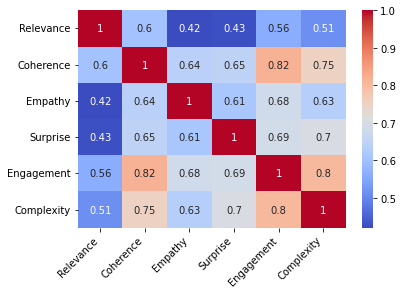

In [111]:
# now let's try and plot a story level correlation matrix 

# let's define all of our human metrics 

human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']
N=len(human_scores)

corr_story_matrix= np.zeros((N, N))
for i in range(N):
    for j in range(N):
        c_metric1= np.array( [json.loads(l) for l in data_scores[human_scores[i]].tolist()]).T
        c_metric2= np.array( [json.loads(l) for l in data_scores[human_scores[j]].tolist()]).T

        k=np.zeros(96)
        
        for l in range(96):
            k[l]=pearsonr(c_metric1[l],c_metric2[l] )[0]
           
        corr_story_matrix[i,j]= k.mean()
    

heatmap=sns.heatmap(corr_story_matrix, annot=True, cmap='coolwarm', xticklabels=human_scores, yticklabels=human_scores)


heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.show()
        

#### Correlation matrix story level for Kendall criterion

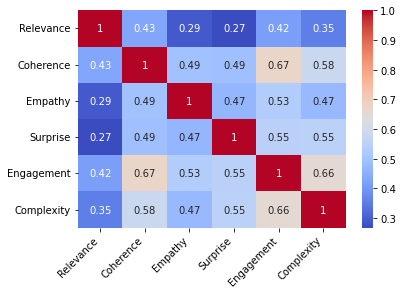

In [110]:
human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']
N=len(human_scores)

corr_story_matrix= np.zeros((N, N))
for i in range(N):
    for j in range(N):
        c_metric1= np.array( [json.loads(l) for l in data_scores[human_scores[i]].tolist()]).T
        c_metric2= np.array( [json.loads(l) for l in data_scores[human_scores[j]].tolist()]).T

        k=np.zeros(96)
        
        for l in range(96):
            k[l]=kendalltau(c_metric1[l],c_metric2[l] )[0]
           
        corr_story_matrix[i,j]= k.mean()
    

heatmap=sns.heatmap(corr_story_matrix, annot=True, cmap='coolwarm', xticklabels=human_scores, yticklabels=human_scores)


heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.show()

### System level correlations

In [113]:


c_system = np.array( [json.loads(l) for l in data_scores[human_scores[i]].tolist()])


array([[2.66666667, 4.        , 4.33333333, ..., 3.        , 3.66666667,
        4.33333333],
       [2.66666667, 2.66666667, 1.33333333, ..., 2.66666667, 3.        ,
        2.66666667],
       [2.66666667, 3.        , 3.        , ..., 1.33333333, 2.33333333,
        2.33333333],
       ...,
       [2.66666667, 1.66666667, 2.66666667, ..., 2.        , 2.66666667,
        1.33333333],
       [1.66666667, 2.66666667, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [2.33333333, 2.66666667, 2.66666667, ..., 2.33333333, 2.33333333,
        3.        ]])